# Homework 1 Theory

## Question 1

Order does matter for a perceptron.

Say we have four points in 2D space as follows:
* Point 1: coordinates (2,0.5), label +1
* Point 2: coordinates (-1,1), label -1
* Point 3: coordinates (-1,-1), label -1
* Point 4: coordinates (1,-2), label +1

We initialize our vector $w$ to be all zeros:
$$w=\begin{bmatrix}
           0 \\
           0 \\
           0
         \end{bmatrix}$$

And our vector $x$ is as follows:
$$x=\begin{bmatrix}
           1 \\
           x_1 \\
           x_2
         \end{bmatrix}$$

### Order 1
First, we will present the algorithm with points in the following order:
1. Point 1
2. Point 2
3. Point 3
4. Point 4

As initialized, the perceptron labels all points above the x-axis with +1 and all below with -1. For Point 1 at (2,0.5) the algorithm labels it with +1, which is its correct label.

Moving on to Point 2 at (-1,1), the algorithm labels this with +1, but this is incorrect. Thus, the algorithm re-figures its weight vector as follows:
$$w_0' = 0+(-1)(1)=-1$$
$$w_1' = 0+(-1)(-1)=1$$
$$w_2'= 0+(-1)(1)=-1$$

And so the new weight vector becomes:
$$w=\begin{bmatrix}
           -1 \\
           1 \\
           -1
         \end{bmatrix}$$

These weights indicate the inequality $-1+x_1-x_2>0 \rightarrow x_2<x_1-1$
This indicates that the perceptron will now label points below the line $x_2=x_1-1$ as positive.

The new line is shown below:

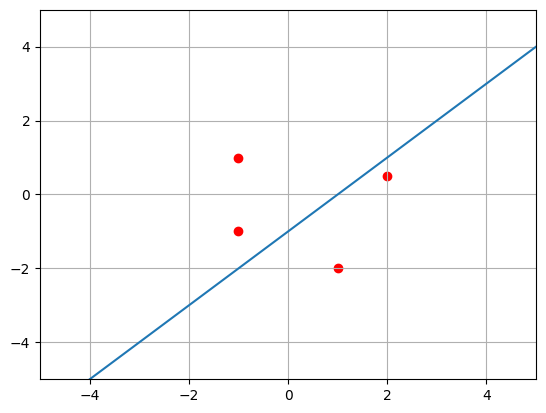

In [13]:
import matplotlib.pyplot as plt 
import numpy as np    

def abline(slope: int, intercept: int, points_x: list, points_y: list):
    """Plot a line from slope and intercept"""
    # Create a figure and axis
    fig, ax = plt.subplots()
    # Set x and y limits
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.ylim(-5, 5)
    plt.xlim(-5, 5)
    plt.grid(True)
    plt.plot(x_vals, y_vals, '-')
    for i in range(len(points_x)):
        plt.scatter(points_x[i], points_y[i], color='red')

abline(slope=1, intercept=-1, points_x=[2,-1,-1,1], points_y=[0.5,1,-1,-2])

From the plot above, we see that Point 1 and Point 4 are now labeled positive, while Point 2 and Point 3 are labeled negative. This is the correct labeling.

So presenting the algorithm with the data order
1. Point 1
2. Point 2
3. Point 3
4. Point 4
results in one mistake and a final weight vector
$$w=\begin{bmatrix}
           -1 \\
           1 \\
           -1
         \end{bmatrix}$$

### Order 2
Next, we will present the algorithm with points in the following order:
1. Point 1
2. Point 4
3. Point 2
4. Point 3

As before, the perceptron labels all points above the x-axis with +1 and all below with -1. For Point 1 at (2,0.5) the algorithm labels it with +1, which is its correct label.

For Point 4 at (1,-2), the algorithm gives a label of -1, which is incorrect. Thus, the algorithm re-figures its weight vector as follows:
$$w_0' = 0+(1)(1)=1$$
$$w_1' = 0+(1)(1)=1$$
$$w_2'= 0+(1)(-2)=-2$$

And so the new weight vector becomes:
$$w=\begin{bmatrix}
           1 \\
           1 \\
           -2
         \end{bmatrix}$$

These weights indicate the inequality $1+x_1-2x_2>0 \rightarrow x_2<\frac{1}{2}x_1+\frac{1}{2}$
This indicates that the perceptron will now label points below the line $x_2=\frac{1}{2}x_1-\frac{1}{2}$ as positive.

The new line is shown below:

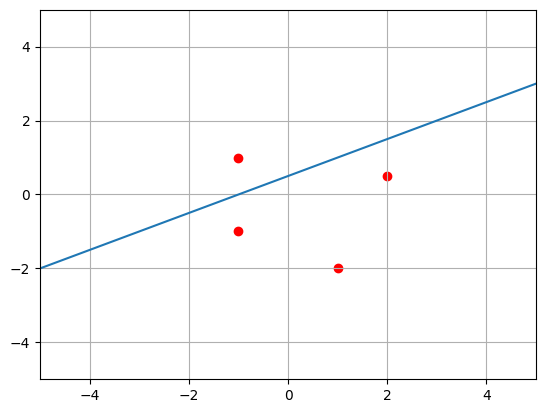

In [14]:
abline(slope=0.5, intercept=0.5, points_x=[2,-1,-1,1], points_y=[0.5,1,-1,-2])

From the plot above, we see that Point 3 at (-1,-1) is now bound to mislabeled; its correct label is -1, but the algorithm will label all points below the line with label +1. **Thus we have shown that the presentation order can affect the number of mistakes made by the perceptron.**

Now that the algorithm has examined Point 4 at (1,-2), it is now presented with Point 2 at (-1,1). This point is above the line, and so is given the label -1, which is correct.

The algorithm now moves to Point 3 at (-1,-1). The perceptron gives this point a label +1, which is incorrect; the label should be -1. Thus, the algorithm re-figures its weight vector as follows:
$$w_0' = 1+(-1)(1)=0$$
$$w_1' = 1+(-1)(-1)=2$$
$$w_2'= -2+(-1)(-1)=-1$$

And so the new weight vector becomes:
$$w=\begin{bmatrix}
           0 \\
           2 \\
           -1
         \end{bmatrix}$$

This weight vector is different from the one found under Order 1. **Thus we have shown that the presentation order can affect the final weight vector for a perceptron.**

The final hyperplane is shown below:

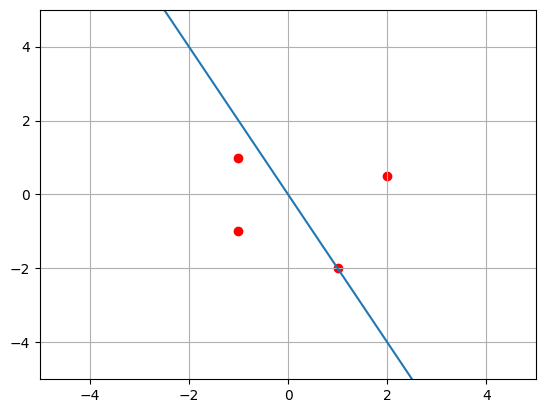

In [15]:
abline(slope=-2, intercept=0, points_x=[2,-1,-1,1], points_y=[0.5,1,-1,-2])

## Question 2

The loss function $\phi (z) = max(0,-z)$ is known as a hinge loss function.

Recall that the perceptron algorithm updates its weight vector only when a mistake is made. We recall the perceptron update rule as follows:
$$w_{new} = w_{old} + yx$$

When equipped with a hinge loss function as in this problem, a SGD algorithm will only update its weight when a classification mistake is made. This behavior is very similar to the perceptron's update rule. We examine why the SGD with a hinge loss behaves this way here:

We are given that the SGD update rule is
$$w_{new} = w_{old} - \eta \nabla \phi(y^i w^T x^i)$$
Note that, when $y^i = w^T x^i$ (i.e., a correct classification is made) then $y^i w^T x^i$ will necessarily be positive. Given that $\phi (z) = max(0,-z)$, if $y^i = w^T x^i$ then $\phi(y^i w^T x^i) = max(0,-(y^i w^T x^i)) = 0$. In other words, given this hinge loss function, if a correct classification estimate is made, then no weight update will occur for the SGD algorithm.

Further, we know that the SGD algorithm deals with only one index $i$ per iteration. As such, the gradient $\nabla \phi(y^i w^T x^i)$ is in fact the standard derivative of $\phi(y^i w^T x^i)$ with respect to $w$. The derivative $\frac{d}{dw}(y^i w^T x^i) = y^i x^i$ and thus the update rule for the SGD becomes $w_{new} = w_{old} - \eta \phi(y^i x^i)$ with function $\phi$ indicating that updating takes place only upon misclassification. This update rule is in fact the same as the perceptron update rule shown above, with the addition of an explicit learning rate $\eta$.

Thus we have shown that the update rule for a hinge loss SGD is the same as the update rule for a perceptron with learning rate $\eta$. In notation:
$$Perceptron \space Learning \space Rule = Hingle \space Loss \space SGD \space Learning \space Rule$$
$$w_{new} = w_{old} + \eta yx = w_{old} - \eta \phi(y^i x^i)$$

## Question 3

### Part (a)

Note that every classifier in $C$ has three regions with alternating labels. For any two of these three regions there exists a decision stump that correctly labels the two regions. For every distribution in $H$ over $\mathbb{R}$ and every partitioning of the real line into three regions, one of these regions must have an $H$-weight of at most 1/3. Thus $\mathbb{P}[h(x) \neq c(x)] \leq 1/3$

### Part (b)

Let $D$ be a probability vector in $\mathbb{R}^m$ where all elements of $D$ are nonnegative and sum to 1. Our problem then becomes the following:
$$min_{\theta \in \mathbb{R}} (\Sigma_{i:y_i=1}D_i \mathbb{1}_{[x_i>0]} + \Sigma_{i:y_i=-1}D_i \mathbb{1}_{[x_i\leq 0]})$$

We sort our data so that $x_1 \leq x_2 \leq \ldots \leq x_m$

Define $\Theta = \{\frac{x_i+x_{i+1}}{2}: i\in [m-1]\}\cup\{(x_1-1),(x_m+1)\}$

We note that for any $\theta \in \mathbb{R}$ there exists $\theta ' \in \Theta$ giving the same predictions for the sample as the threshold $\theta$. Thus, rather than minimize over $\theta \in \mathbb{R}$ we can minimize over $\theta \in \Theta$

Suppose we have calculated the objective for $\theta \in (x_{i-1},x_i)$. Let $F(\theta)$ be the value of the objective. When we consider $\theta ' \in (x_{i-1},x_i)$ we have the following:
$$F(\theta ') = F(\theta) - D_i 1_{[y_i=1]} + D_i 1_{[y_i=-1]} = F(\theta) - y_iD_i$$

This method of sorting data and phrasing each iteration over m as building off the previous iteration allows the minimum error decision stump to be found in time complexity O(m).

### Part (c)

Since the VC-dimension of a decision stump is 2, so long as a sample size is greater than $\Omega(log(1/\delta)/\epsilon^2)$ then with probability at least $1-\delta$, the ERM will return a hypothesis with error at most $1/3+\epsilon$. Thus $H$ is a weak learner for $C$.